In [ ]:
# Importing libraries

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
# Most common stopWords

sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [ ]:
# Reading data

with open("bbc.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)


print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [ ]:
train_size = int(len(sentences) * 0.8)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))


1780
1780
1780
445
445


In [ ]:
# Define tokenizer

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index



In [ ]:
# train_data

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))


449
1000
200
1000
192
1000


In [ ]:
# validation_data

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 1000)


In [ ]:
# Labels

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
# Creating the model

model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
# Compile
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1000, 16)          16000     
                                                                 
 global_average_pooling1d_8   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_50 (Dense)            (None, 24)                408       
                                                                 
 dense_51 (Dense)            (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting
num_epochs = 30
history = model1.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7774 - accuracy: 0.2140 - val_loss: 1.7566 - val_accuracy: 0.2382 - 868ms/epoch - 15ms/step
Epoch 2/30
56/56 - 0s - loss: 1.7377 - accuracy: 0.2270 - val_loss: 1.7065 - val_accuracy: 0.2382 - 278ms/epoch - 5ms/step
Epoch 3/30
56/56 - 0s - loss: 1.6896 - accuracy: 0.2270 - val_loss: 1.6594 - val_accuracy: 0.2382 - 287ms/epoch - 5ms/step
Epoch 4/30
56/56 - 0s - loss: 1.6452 - accuracy: 0.2270 - val_loss: 1.6229 - val_accuracy: 0.2382 - 235ms/epoch - 4ms/step
Epoch 5/30
56/56 - 0s - loss: 1.6123 - accuracy: 0.3034 - val_loss: 1.5966 - val_accuracy: 0.2472 - 258ms/epoch - 5ms/step
Epoch 6/30
56/56 - 0s - loss: 1.5872 - accuracy: 0.2978 - val_loss: 1.5742 - val_accuracy: 0.2876 - 241ms/epoch - 4ms/step
Epoch 7/30
56/56 - 0s - loss: 1.5634 - accuracy: 0.3556 - val_loss: 1.5515 - val_accuracy: 0.2719 - 231ms/epoch - 4ms/step
Epoch 8/30
56/56 - 0s - loss: 1.5314 - accuracy: 0.3860 - val_loss: 1.5126 - val_accuracy: 0.4000 - 278ms/epoch - 5ms/step
Epoch 9/30
56/5

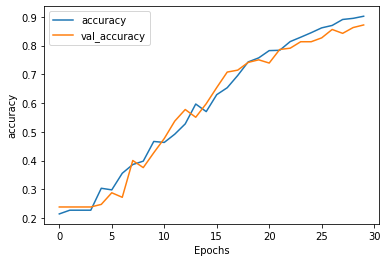

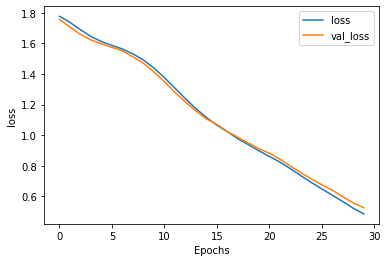

0.8719100952148438


In [ ]:
# Plotting model accuracy
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
accuracy1=max(history.history['val_accuracy'])
print(accuracy1)

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow import keras
layers = keras.layers
models = keras.models

In [ ]:
data = pd.read_csv("bbc.csv")

In [ ]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1780
Test size: 445


In [ ]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [ ]:
train_cat, test_cat = train_test_split(data['category'], train_size)
train_text, test_text = train_test_split(data['text'], train_size)

In [ ]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words,
                                              char_level=False)

In [ ]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [ ]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [ ]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Inspect the dimenstions of our training and test data
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


In [ ]:
batch_size = 32
epochs = 5
drop_ratio = 0.5

In [ ]:
# Build the model
model2 = models.Sequential()
model2.add(layers.Dense(512, input_shape=(max_words,)))
model2.add(layers.Activation('relu'))
model2.add(layers.Dense(num_classes))
model2.add(layers.Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/5
51/51 [==============================] - 1s 8ms/step - loss: 0.4374 - accuracy: 0.8727 - val_loss: 0.1630 - val_accuracy: 0.9551
Epoch 2/5
51/51 [==============================] - 0s 6ms/step - loss: 0.0408 - accuracy: 0.9956 - val_loss: 0.1101 - val_accuracy: 0.9663
Epoch 3/5
51/51 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.9994 - val_loss: 0.1075 - val_accuracy: 0.9663
Epoch 4/5
51/51 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9663
Epoch 5/5
51/51 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1071 - val_accuracy: 0.9663


In [ ]:
# Evaluate the accuracy of our trained model
score2 = model2.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
accuracy2=score2[1]
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

14/14 [==============================] - 0s 3ms/step - loss: 0.1233 - accuracy: 0.9618
Test loss: 0.12330809980630875
Test accuracy: 0.9617977738380432


model3

In [ ]:
# Build the model
model3 = models.Sequential()
model3.add(layers.Dense(512, input_shape=(max_words,)))
model3.add(layers.Activation('tanh'))
model3.add(layers.Dense(num_classes))
model3.add(layers.Activation('softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/5
51/51 [==============================] - 1s 8ms/step - loss: 0.3323 - accuracy: 0.8976 - val_loss: 0.1447 - val_accuracy: 0.9382
Epoch 2/5
51/51 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9950 - val_loss: 0.1319 - val_accuracy: 0.9438
Epoch 3/5
51/51 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9551
Epoch 4/5
51/51 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1194 - val_accuracy: 0.9551
Epoch 5/5
51/51 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1191 - val_accuracy: 0.9607


In [ ]:
# Evaluate the accuracy of our trained model
score3 = model3.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
accuracy3=score3[1]
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
random_model=min(accuracy1,accuracy2,accuracy3)
ensemble_accuracy=max(accuracy1,accuracy2,accuracy3)

14/14 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.9528
Test loss: 0.13922947645187378
Test accuracy: 0.9528089761734009


In [ ]:
def misclassified(rand_accuracy,ensembled_acc):
  length=len(y_test)
  find=length*(ensembled_acc-rand_accuracy)
  find=math.ceil(find)
  return find

In [ ]:
print("Accuracy for Vanilla RNN:",accuracy1)
print("Accuracy for ffn1:       ",accuracy2)
print("Accuracy for ffn tanh:   ",accuracy3)
print("ensembled accuracy:      ",ensemble_accuracy)

Accuracy for Vanilla RNN: 0.8719100952148438
Accuracy for ffn1:        0.9617977738380432
Accuracy for ffn tanh:    0.9528089761734009
ensembled accuracy:       0.9617977738380432


In [ ]:
diff=misclassified( random_model , ensemble_accuracy)
diff1=misclassified(0,1-accuracy1)
diff2=misclassified(0,1-accuracy2)
diff3=misclassified(0,1-accuracy3)
print("Instances misclassified by any of the three models, but correctly classified in the ensemble model ",diff)
print("Instances misclassified by Vanilla RNN                                                             ",diff1)
print("Instances misclassified by ffn1 model                                                              ",diff2)
print("Instances misclassified by ffn tanh model                                                          ",diff3)

Instances misclassified by any of the three models, but correctly classified in the ensemble model  41
Instances misclassified by Vanilla RNN                                                              58
Instances misclassified by ffn1 model                                                               17
Instances misclassified by ffn tanh model                                                           22
